# Tarea: La Subasta del Peix
Hecho por: Andres Vega, Oscar Segura

El siguiente código implementa una **simulación de subastas** modelada como un sistema multiagente en Python utilizando la biblioteca **osBrain**. En esta simulación, diferentes tipos de comerciantes (básicos, ricos y pobres) interactúan con un operador para comprar pescado en un mercado basado en la tradición catalana de **“la Subhasta del Peix”**. Esta subasta sigue el modelo de **subasta holandesa**, donde los precios de los productos disminuyen hasta que un comprador realiza una oferta o el precio alcanza un valor mínimo.

## **Introducción**

Hasta ahora, trabajamos con agentes que interactuaban dentro de un entorno o ignoraban a sus compañeros. Sin embargo, uno de los elementos clave en sistemas multiagente es la comunicación entre agentes. En esta tarea, modelaremos una subasta holandesa en Python, donde el operador y los comerciantes interactúan enviándose mensajes a través de canales de comunicación.

### **Objetivo de la Simulación**
- Modelar una subasta holandesa para la compra y venta de tres tipos de pescado: **merluza (H)**, **lenguado (S)** y **atún (T)**.
- Garantizar que los comerciantes gestionen su presupuesto para adquirir pescado, dando prioridad a sus preferencias.
- Explorar cómo los agentes interactúan a través del paso de mensajes para negociar y realizar compras.

---

## **Configuración General**

1. **Operador (Operator):**
   - Es el propietario de la subasta y administra la venta de los productos.
   - Cada pescado tiene un **precio inicial** y un **precio mínimo** (valor de descarte).
   - Publica información de cada producto y procesa las ofertas de los comerciantes.

2. **Comerciantes (Merchants):**
   - Representan a los posibles compradores.
   - Cada comerciante tiene un **presupuesto** inicial y una **preferencia** por un tipo de pescado.
   - El objetivo es adquirir al menos un pescado de cada tipo y priorizar la compra del tipo preferido.

---

## **Implementación**

### **Dinámica de la Subasta**
- **Rondas de Subasta:** En cada ronda, el operador publica un nuevo pescado con un precio inicial.
- **Reducción de Precios:** Si ningún comerciante puja, el precio disminuye en intervalos hasta alcanzar el precio mínimo.
- **Venta:** Si un comerciante realiza una puja, el pescado se vende al precio actual y la subasta pasa al siguiente producto.
- **Descarte:** Si el precio mínimo se alcanza sin que haya pujas, el pescado se descarta.

### **Participantes**
- **Operador:**
  - Publica cada pescado y reduce el precio gradualmente si no hay pujas.
  - Procesa las pujas y confirma la venta.
- **Comerciantes:**
  - Evalúan los productos en función de su precio, tipo y presupuesto.
  - Realizan pujas estratégicas según su preferencia y necesidad de completar su inventario.

---

## **Escenario Configurado**

### **Operador**
- Tipo: Finito con evaluación de calidad.
- Número máximo de pescados a subastar: 5.

### **Comerciantes**
1. **Básicos:**
   - Presupuesto inicial: 100.
   - Lógica estándar para realizar pujas.
   - Número configurado: 3.

2. **Ricos:**
   - Presupuesto inicial: 500.
   - Prioridad en pescados preferidos a precios altos.
   - Número configurado: 0.

3. **Pobres:**
   - Presupuesto inicial: 50.
   - Solo compran pescados con descuentos significativos.
   - Número configurado: 2.

---

## **Propósito del Sistema Multiagente**
Esta simulación permite analizar:
- La interacción entre agentes mediante el paso de mensajes.
- La dinámica del mercado en un entorno de subasta holandesa.
- Cómo las preferencias y presupuestos afectan las decisiones de compra de los comerciantes.

In [1]:
# Cell 1: Configuration
# ==========================
# Auction Simulation Config
# ==========================

# Select the type of operator for the simulation:
# 1 - Infinite Operator (no quality)
# 2 - Finite Operator (no quality)
# 3 - Infinite Operator with Quality
# 4 - Finite Operator with Quality
# Default: 1
operator_type: 4

# For finite operators (type 2 and 4 only):
# Specify the total number of fish to sell before the simulation stops.
# Example: 10
# Default: 10
total_fish_to_sell: 5

# Set the number of Basic Merchants:
# Basic merchants have a budget of 100 and standard logic.
# Example: 3
# Default: 0
num_basic_merchants: 3

# Set the number of Rich Merchants:
# Rich merchants have a higher budget of 500 and focus on preferred fish.
# Example: 2
# Default: 0
num_rich_merchants: 0

# Set the number of Poor Merchants:
# Poor merchants have a budget of 50 and only buy heavily discounted fish.
# Example: 1
# Default: 0
num_poor_merchants: 2

# ==========================
# End of Config
# ==========================

# ==========================
# Auction Simulation Config
# ==========================

# Select the type of operator for the simulation:
# 1 - Infinite Operator (no quality)
# 2 - Finite Operator (no quality)
# 3 - Infinite Operator with Quality
# 4 - Finite Operator with Quality
# Default: 1
operator_type: 4

# For finite operators (type 2 and 4 only):
# Specify the total number of fish to sell before the simulation stops.
# Example: 10
# Default: 10
total_fish_to_sell: 5

# Set the number of Basic Merchants:
# Basic merchants have a budget of 100 and standard logic.
# Example: 3
# Default: 0
num_basic_merchants: 3

# Set the number of Rich Merchants:
# Rich merchants have a higher budget of 500 and focus on preferred fish.
# Example: 2
# Default: 0
num_rich_merchants: 0

# Set the number of Poor Merchants:
# Poor merchants have a budget of 50 and only buy heavily discounted fish.
# Example: 1
# Default: 0
num_poor_merchants: 2

# ==========================
# End of Config
# ==========================


### Agentes `Comerciantes`

El siguiente código define tres tipos de **agentes comerciantes** que participan en una **subasta de pescado**. 
Los agentes heredan de una clase base Merchant y tienen comportamientos personalizados para decidir si compran pescado según su presupuesto, preferencias y estrategias específicas.

---

### **Clase: Merchant**
- **Propiedades principales:**
  - **Inventario**: Los productos adquiridos se almacenan aquí.
  - **Presupuesto inicial**: Cada comerciante comienza con un presupuesto que puede ajustarse en las subclases.
  - **Preferencia**: Cada comerciante tiene un tipo de pescado preferido (H, S o T), elegido aleatoriamente.
  - **Umbrales de precio**: Determina cuánto están dispuestos a pagar según la calidad (buena, normal, mala).

- **Métodos principales:**
  - **`on_product_info`**: Decide si pujar o no por un producto, considerando:
    - El tipo y calidad del pescado.
    - El precio en relación con los umbrales de preferencia.
    - Las condiciones del inventario.
  - **`on_confirmation`**: Maneja la confirmación de una compra, actualizando:
    - El presupuesto.
    - El inventario y los umbrales de precio.
  - **`on_operator_message`**: Procesa mensajes del operador sobre las subastas.

---

### **Subclases de Comerciantes**

#### **1. BasicMerchant**
- **Características:**
  - Presupuesto inicial: **100**.
  - Lógica estándar para decidir compras basada en preferencias y precios.

#### **2. RichMerchant**
- **Características:**
  - Presupuesto inicial: **500**.
  - Siempre compra pescado preferido si el precio es aceptable.
  - Umbral de precio fijo (30) para pescado de calidad preferida (sin disminución del umbral tras compras).

#### **3. PoorMerchant**
- **Características:**
  - Presupuesto inicial: **50**.
  - Solo compra pescado cuando el precio está muy descontado (<=15).
  - Evita cualquier gasto significativo en pescado no prioritario.

---

### **Flujo General**
1. **Inicio**: Los comerciantes configuran su presupuesto, preferencias y lógica de compra.
2. **Recepción de información del producto**: Cada comerciante evalúa el pescado en subasta (precio, calidad, preferencia).
3. **Decisión de puja**: Dependiendo de las reglas personalizadas de cada tipo de comerciante, decide si pujar.
4. **Confirmación de compra**: Se actualiza el inventario y el presupuesto si se confirma la compra.

In [7]:
import random
from osbrain import Agent

class Merchant(Agent):
    def on_init(self):
        self.inventory = {}
        self.budget = 100  # Default budget, adjustable by subclasses
        self.preference = random.choice(['H', 'S', 'T'])  # Random fish type preference
        self.log_info(f"My preference is: {self.preference}")
        self.fish_types = ['H', 'S', 'T']
        self.current_auctions = {}

        # Inventory counts per fish type
        self.inventory_counts = {fish_type: 0 for fish_type in self.fish_types}

        # Quality-based price thresholds and minimums
        self.preferred_price_thresholds = {'good': 30, 'normal': 20, 'bad': 10}
        self.preferred_price_minimums = {'good': 10, 'normal': 10, 'bad': 10}

    def get_name(self):
        """
        Return the name of the merchant for external access.
        """
        return self.name

    def on_operator_message(self, message):
        """Handles incoming messages from the operator."""
        message_type = message.get('message_type')
        if message_type == 'auction_info':
            self.on_product_info(message)
        elif message_type == 'confirmation':
            self.on_confirmation(message)

    def on_product_info(self, message):
        """
        Handles product auction information and decides whether to bid.
        Supports quality as an optional attribute.
        """
        product_number = message.get('product_number')
        product_type = message.get('product_type')
        price = message.get('price')
        quality = message.get('quality', None)  # Defaults to None if not provided

        # Skip if auction is closed or budget is insufficient
        if self.budget < price or self.current_auctions.get(product_number, {}).get('status') == 'closed':
            return

        # Store auction details
        self.current_auctions[product_number] = {
            'product_type': product_type,
            'quality': quality,
            'price': price,
            'status': 'open'
        }

        # Determine the threshold for quality (default to mid-range if not specified)
        threshold = self.preferred_price_thresholds.get(quality, 20)

        # Buying logic
        should_buy = False
        if product_type == self.preference:
            # Buy preferred fish within acceptable price range
            if price <= threshold:
                should_buy = True
        else:
            # Buy non-preferred fish if discounted and inventory is empty
            if self.inventory_counts[product_type] == 0 and price <= (threshold / 2):
                should_buy = True

        if should_buy:
            self.log_info(f"Attempting to buy Fish {product_number} at price {price} with quality {quality}")
            bid = {
                'merchant_id': self.name,
                'product_number': product_number,
            }
            # Send bid to operator
            self.send('bid_channel', bid)
            # Mark auction as pending
            self.current_auctions[product_number]['status'] = 'pending'

    def on_confirmation(self, message):
        """
        Handles confirmation of purchase and updates inventory, budget, and price thresholds.
        """
        merchant_id = message.get('merchant_id')
        if merchant_id != self.name:
            return  # Ignore confirmations not meant for this merchant

        product_number = message.get('product_number')
        price = message.get('price')
        product_type = message.get('product_type')
        quality = message.get('quality', None)

        self.log_info(f"Purchase confirmed for Fish {product_number} at price {price} with quality {quality}")
        self.budget -= price

        # Update inventory
        self.inventory[product_number] = {
            'type': product_type,
            'quality': quality,
            'price': price
        }
        self.inventory_counts[product_type] += 1
        self.log_info(f"Remaining budget: {self.budget}")

        # Mark auction as closed
        self.current_auctions[product_number]['status'] = 'closed'

        # Adjust thresholds if preferred fish is bought
        if product_type == self.preference and quality in self.preferred_price_thresholds:
            old_threshold = self.preferred_price_thresholds[quality]
            self.preferred_price_thresholds[quality] *= 0.8  # Reduce threshold by 20%
            if self.preferred_price_thresholds[quality] < self.preferred_price_minimums[quality]:
                self.preferred_price_thresholds[quality] = self.preferred_price_minimums[quality]
            self.log_info(
                f"Threshold for {quality} quality reduced from {old_threshold:.2f} to {self.preferred_price_thresholds[quality]:.2f}"
            )

    def on_exit(self):
        """Optional cleanup logic."""
        self.log_info("Merchant shutting down.")



class BasicMerchant(Merchant):
    def on_init(self):
        super().on_init()
        self.budget = 100


class RichMerchant(Merchant):
    def on_init(self):
        super().on_init()
        self.budget = 500
        # Rich merchants always accept the max price for preferred fish
        self.preferred_price_threshold = 30
        self.preferred_price_minimum = 30  # No decrease

    def on_confirmation(self, message):
        """
        Handles confirmation of purchase and updates inventory, budget, and price thresholds.
        """
        merchant_id = message.get('merchant_id')
        if merchant_id != self.name:
            return  # Ignore confirmations not meant for this merchant

        product_number = message.get('product_number')
        price = message.get('price')
        product_type = message.get('product_type')
        quality = message.get('quality', 'N/A')  # Ensure quality is logged correctly

        self.log_info(f"Purchase confirmed for Fish {product_number} at price {price} with quality {quality}")
        self.budget -= price

        # Update inventory with quality
        self.inventory[product_number] = {
            'type': product_type,
            'quality': quality,
            'price': price
        }
        self.inventory_counts[product_type] += 1
        self.log_info(f"Remaining budget: {self.budget}")


class PoorMerchant(Merchant):
    def on_init(self):
        super().on_init()
        self.budget = 50
        # Set a low preferred price threshold
        self.preferred_price_threshold = 15
        self.preferred_price_minimum = 10

    def on_product_info(self, message):
        # Override buying logic to only buy at heavy discounts
        product_number = message.get('product_number')
        product_type = message.get('product_type')
        price = message.get('price')

        if self.budget >= price and self.current_auctions.get(product_number, {}).get('status') != 'closed':
            self.current_auctions[product_number] = {
                'product_type': product_type,
                'price': price,
                'status': 'open'
            }
            should_buy = False

            if price <= 15:
                # Only buy if price is heavily discounted
                should_buy = True

            if should_buy:
                self.log_info(f"Attempting to buy Fish {product_number} at price {price}")
                bid = {
                    'merchant_id': self.name,
                    'product_number': product_number,
                }
                self.send('bid_channel', bid)
                self.current_auctions[product_number]['status'] = 'pending'

### Agente `Operador`

El operador es el **propietario de la subasta**, responsable de gestionar y publicar los productos. Cada producto tiene un **precio inicial** y un **precio mínimo**. Solo habrá un operador en la simulación.

---

### **Clase Base: `Operator`**
1. **Propósito:** Gestiona el flujo de la subasta y la interacción con los comerciantes.
2. **Atributos Principales:**
   - **`publish_channel` y `bid_channel`:** Canales para enviar información sobre los productos y recibir pujas de los comerciantes.
   - **`fish_types`:** Tipos de pescado disponibles (H, S, T).
   - **`current_auction`:** Producto actualmente en subasta con su precio inicial y mínimo.
   - **`transactions`:** Registro de todas las transacciones realizadas.
   - **`running`:** Bandera que indica si la subasta está activa.
3. **Métodos Importantes:**
   - **`start_auction`:** Inicia la subasta.
   - **`auction_next_fish`:** Prepara y publica el siguiente producto en subasta (implementado en subclases).
   - **`send_fish_info`:** Publica los detalles del producto en subasta (precio inicial, tipo).
   - **`on_bid`:** Procesa pujas recibidas, vendiendo el producto si la puja es válida.
   - **`check_for_replies`:** Reduce el precio del producto si no se reciben pujas (definido en subclases).

---

### **Clases Derivadas:**
1. **`OperatorInfinite`:** 
   - Maneja subastas con un inventario "infinito" de productos. 
   - Publica cada producto con un precio inicial y reduce el precio hasta alcanzar el valor mínimo si no hay compradores.

2. **`OperatorFinite`:** 
   - Maneja subastas con un número limitado de productos para vender.
   - Termina la subasta tras alcanzar el número configurado de productos vendidos.

3. **Clases con Calidad (`Quality`):**
   - **`OperatorInfiniteQuality` y `OperatorFiniteQuality`:** Extienden la funcionalidad para incluir la calidad (buena, normal, mala) en cada producto, lo que influye en la decisión de compra de los comerciantes.

---

### **Flujo General del `Operator`:**
1. **Publicación del Producto:**
   - Cada producto tiene un precio inicial y un precio mínimo.
   - La información del producto se publica para que los comerciantes puedan pujar.
2. **Procesamiento de Pujas:**
   - Si un comerciante realiza una puja válida, el producto se vende al precio actual.
   - Se registra la transacción y se publica una confirmación.
3. **Reducción de Precio:**
   - Si no hay pujas, el precio se reduce de forma iterativa hasta alcanzar el precio mínimo.
   - Si el precio mínimo es alcanzado y no hay compradores, el producto se marca como "no vendido".
4. **Finalización:**
   - La subasta termina cuando se cumplen las condiciones (inventario agotado o límite de ventas alcanzado).

import random
from osbrain import Agent

class Operator(Agent):
    def on_init(self):
        # PUB socket to broadcast auction info and confirmations
        self.publish_address = self.bind('PUB', alias='publish_channel')
        # PULL socket to receive bids from merchants
        self.bid_address = self.bind('PULL', alias='bid_channel', handler=self.on_bid)
        self.fish_types = ['H', 'S', 'T']
        self.fish_index = 0
        self.transactions = []
        self.current_auction = None
        self.running = True  # Indicates whether the auction is running


    def start_auction(self):
        self.auction_next_fish()

    def auction_next_fish(self):
        # To be implemented in subclasses
        pass

    def send_fish_info(self):
        auction = self.current_auction
        if not auction['sold']:
            self.log_info(
                f"Auctioning Fish {auction['product_number']}: Type {auction['fish_type']}, Price {auction['current_price']}."
            )
            product_info = {
                'message_type': 'auction_info',
                "product_number": auction['product_number'],
                "product_type": auction['fish_type'],
                "price": auction['current_price']
            }
            self.send('publish_channel', product_info)
            self.timer = self.after(1, self.check_for_replies, alias='price_decrement_timer')

    def on_bid(self, bid):
        self.log_info(f"Received bid: {bid}")
        merchant_id = bid.get('merchant_id')
        auction = self.current_auction
        if auction and not auction['sold']:
            if bid.get('product_number') == auction['product_number']:
                # Sell the fish
                self.log_info(f"Fish {auction['product_number']} sold to Merchant {merchant_id} at price {auction['current_price']}.")
                auction['sold'] = True
                self.transactions.append({
                    'Product': auction['product_number'],
                    'SellPrice': auction['current_price'],
                    'Merchant': merchant_id
                })
                # Stop the timer
                self.stop_timer('price_decrement_timer')
                # Send confirmation
                confirmation = {
                    'message_type': 'confirmation',
                    'status': 'confirmed',
                    'product_number': auction['product_number'],
                    'merchant_id': merchant_id,
                    'price': auction['current_price'],
                    'product_type': auction['fish_type']
                }
                self.send('publish_channel', confirmation)
                # Move to the next auction
                self.auction_next_fish()
        # If fish already sold or bid is invalid, ignore

    def check_for_replies(self, *args, **kwargs):
        # To be implemented in subclasses
        pass

    def on_stop(self):
        log_transactions(self.transactions)


class OperatorInfinite(Operator):
    def on_init(self):
        super().on_init()
        self.fish_in_stock = 30
        self.unsold_count = 0
        self.max_unsold = 3

    def auction_next_fish(self):
        if self.fish_in_stock > 0 and self.unsold_count < self.max_unsold:
            fish_type = self.fish_types[self.fish_index % len(self.fish_types)]
            self.fish_index += 1
            self.fish_in_stock -= 1
            self.current_auction = {
                'fish_type': fish_type,
                'product_number': self.fish_index,
                'current_price': 30,
                'bottom_price': 10,
                'price_decrement': 2,
                'sold': False
            }
            self.send_fish_info()
        else:
            self.log_info("Auction ended.")
            self.running = False  # Set running to False when auction ends

    def check_for_replies(self, *args, **kwargs):
        auction = self.current_auction
        if not auction['sold']:
            auction['current_price'] -= auction['price_decrement']
            if auction['current_price'] >= auction['bottom_price']:
                self.send_fish_info()
            else:
                self.log_info(f"Fish {auction['product_number']} was not sold.")
                self.unsold_count += 1
                self.transactions.append({
                    'Product': auction['product_number'],
                    'SellPrice': 0,
                    'Merchant': 0  # Indicate unsold
                })
                self.auction_next_fish()


class OperatorFinite(Operator):
    def on_init(self):
        super().on_init()
        self.total_fish_to_sell = self.get_attr('total_fish_to_sell')
        self.fish_sold_count = 0

    def auction_next_fish(self):
        if self.fish_sold_count < self.total_fish_to_sell:
            fish_type = self.fish_types[self.fish_index % len(self.fish_types)]
            self.fish_index += 1
            self.current_auction = {
                'fish_type': fish_type,
                'product_number': self.fish_index,
                'current_price': 30,
                'bottom_price': 10,
                'price_decrement': 2,
                'sold': False
            }
            self.send_fish_info()
        else:
            self.log_info("Auction ended after selling the specified number of fish.")
            self.running = False  # Set running to False when auction ends

    def check_for_replies(self, *args, **kwargs):
        auction = self.current_auction
        if not auction['sold']:
            auction['current_price'] -= auction['price_decrement']
            if auction['current_price'] >= auction['bottom_price']:
                self.send_fish_info()
            else:
                self.log_info(f"Fish {auction['product_number']} was not sold.")
                self.transactions.append({
                    'Product': auction['product_number'],
                    'SellPrice': 0,
                    'Merchant': 0  # Indicate unsold
                })
                self.fish_sold_count += 1  # Increment the sold count for unsold fish
                self.auction_next_fish()


    def on_bid(self, bid):
        self.log_info(f"Received bid: {bid}")
        merchant_id = bid.get('merchant_id')
        auction = self.current_auction
        if auction and not auction['sold']:
            if bid.get('product_number') == auction['product_number']:
                # Sell the fish
                self.log_info(
                    f"Fish {auction['product_number']} sold to Merchant {merchant_id} at price {auction['current_price']}."
                )
                auction['sold'] = True
                self.transactions.append({
                    'Product': auction['product_number'],
                    'SellPrice': auction['current_price'],
                    'Merchant': merchant_id
                })
                # Increment fish_sold_count for sold fish
                self.fish_sold_count += 1

                # Stop the timer
                self.stop_timer('price_decrement_timer')

                # Send confirmation with quality
                confirmation = {
                    'message_type': 'confirmation',
                    'status': 'confirmed',
                    'product_number': auction['product_number'],
                    'merchant_id': merchant_id,
                    'price': auction['current_price'],
                    'product_type': auction['fish_type'],
                    'quality': auction.get('quality')  # Include quality in confirmation
                }
                self.send('publish_channel', confirmation)

                # Move to the next auction
                self.auction_next_fish()


class OperatorInfiniteQuality(OperatorInfinite):
    def auction_next_fish(self):
        if self.fish_in_stock > 0 and self.unsold_count < self.max_unsold:
            fish_type = self.fish_types[self.fish_index % len(self.fish_types)]
            fish_quality = random.choice(['good', 'normal', 'bad'])
            self.fish_index += 1
            self.fish_in_stock -= 1
            self.current_auction = {
                'fish_type': fish_type,
                'quality': fish_quality,
                'product_number': self.fish_index,
                'current_price': 30,
                'bottom_price': 10,
                'price_decrement': 2,
                'sold': False
            }
            self.send_fish_info()
        else:
            self.log_info("Auction ended.")
            self.running = False  # Set running to False when auction ends

    def send_fish_info(self):
        auction = self.current_auction
        if not auction['sold']:
            self.log_info(
                f"Auctioning Fish {auction['product_number']}: Type {auction['fish_type']}, "
                f"Quality {auction['quality']}, Price {auction['current_price']}."
            )
            product_info = {
                'message_type': 'auction_info',
                'product_number': auction['product_number'],
                'product_type': auction['fish_type'],
                'quality': auction['quality'],
                'price': auction['current_price']
            }
            self.send('publish_channel', product_info)
            self.timer = self.after(1, self.check_for_replies, alias='price_decrement_timer')


# New OperatorFiniteQuality subclass with quality
class OperatorFiniteQuality(OperatorFinite):
    def auction_next_fish(self):
        if self.fish_sold_count < self.total_fish_to_sell:
            fish_type = self.fish_types[self.fish_index % len(self.fish_types)]
            fish_quality = random.choice(['good', 'normal', 'bad'])
            self.fish_index += 1
            self.current_auction = {
                'fish_type': fish_type,
                'quality': fish_quality,
                'product_number': self.fish_index,
                'current_price': 30,
                'bottom_price': 10,
                'price_decrement': 2,
                'sold': False
            }
            self.send_fish_info()
        else:
            self.log_info("Auction ended after selling the specified number of fish.")
            self.running = False  # Set running to False when auction ends

    def send_fish_info(self):
        auction = self.current_auction
        if not auction['sold']:
            self.log_info(
                f"Auctioning Fish {auction['product_number']}: Type {auction['fish_type']}, "
                f"Quality {auction['quality']}, Price {auction['current_price']}."
            )
            product_info = {
                'message_type': 'auction_info',
                'product_number': auction['product_number'],
                'product_type': auction['fish_type'],
                'quality': auction['quality'],
                'price': auction['current_price']
            }
            self.send('publish_channel', product_info)
            self.timer = self.after(1, self.check_for_replies, alias='price_decrement_timer') 

### Simulacion de la Subasta del Peix

El siguiente código representa el **programa principal** de la simulación de subasta del Peix basada en un sistema multiagente utilizando la biblioteca **osBrain**. 
A continuación, se explica cómo interactúan los agentes en la simulación:

---

### **Propósito del Código**
1. **Configuración de Agentes:**
   - Lee un archivo de configuración para inicializar el **operador** (único propietario de la subasta) y los **comerciantes** (posibles compradores).
   - Crea y conecta agentes al sistema de comunicación, estableciendo roles y preferencias.

2. **Inicio de la Subasta:**
   - El operador publica información sobre cada pescado y reduce gradualmente los precios en cada ronda.
   - Los comerciantes reciben mensajes del operador, evalúan si realizar una oferta y envían sus pujas al operador.

3. **Registro de Resultados:**
   - Se registran los detalles del inventario de los comerciantes y las transacciones realizadas durante la subasta.

---

### **Resumen del flujo de trabajo de la Subasta**
1. **Creación de Agentes:**
   - **Operador:** Se inicializa un único operador basado en el tipo definido en la configuración (infinito, finito, con o sin calidad).
   - **Comerciantes:** Se crean comerciantes básicos, ricos y pobres según el número especificado en la configuración, asignándoles un presupuesto y preferencias aleatorias.

2. **Conexión de Agentes:**
   - Los comerciantes se conectan al canal de publicación del operador para recibir información sobre la subasta.
   - Los comerciantes también establecen un canal de envío para enviar sus pujas al operador.

3. **Interacción de Agentes:**
   - **Operador:** Publica productos y procesa las pujas recibidas, determinando si un pescado se vende o se descarta.
   - **Comerciantes:** Deciden si comprar un pescado basándose en su presupuesto, preferencias y el precio actual.

4. **Finalización:**
   - Una vez que la subasta termina, el inventario final de los comerciantes y las transacciones se registran en archivos.


In [ ]:
from osbrain import run_nameserver, run_agent, Agent
import csv
import random
from datetime import datetime
import time
import logging
from threading import Thread
from merchants import BasicMerchant, RichMerchant, PoorMerchant
from operators import OperatorInfinite, OperatorFinite, OperatorInfiniteQuality, OperatorFiniteQuality



# Set logging level to DEBUG for osBrain
logging.getLogger('osbrain').setLevel(logging.DEBUG)



def read_config_file(file_path):
    """
    Reads and parses the configuration file.
    """
    config = {}
    try:
        with open(file_path, 'r') as file:
            for line in file:
                line = line.strip()
                if line and not line.startswith("#"):  # Ignore comments and empty lines
                    key, value = line.split(":")
                    config[key.strip()] = value.strip()
    except Exception as e:
        print(f"Error reading configuration file: {e}")
        exit(1)
    return config


def log_merchants_inventory(merchants):
    """
    Logs each merchant's inventory details to a plain text file.
    """
    date_str = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
    filename = f'merchant_inventory_{date_str}.txt'
    
    with open(filename, 'w', encoding='utf-8') as file:
        file.write("=== Merchant Inventory Report ===\n\n")
        for merchant in merchants:
            merchant_name = merchant.get_name()  # Use the exposed method
            merchant_budget = merchant.get_attr('budget')
            inventory = merchant.get_attr('inventory')

            # Write Merchant Header
            file.write(f"Merchant: {merchant_name}\n")
            file.write(f"Remaining Budget: {merchant_budget}\n")
            file.write("Inventory:\n")
            
            # Check if inventory is empty
            if not inventory:
                file.write("  - No items in inventory\n")
            else:
                # Write each fish in the inventory
                for product_number, details in inventory.items():
                    fish_type = details.get('type', 'Unknown')
                    quality = details.get('quality', 'N/A')
                    price = details.get('price', 'N/A')
                    file.write(f"  - Product {product_number}: Type {fish_type}, Quality {quality}, Price {price}\n")
            
            file.write("\n")  # Add spacing between merchants
        file.write("=== End of Report ===\n")
    
    print(f"Merchant inventory report saved to '{filename}'.")


def log_transactions(transactions):
    date_str = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
    with open(f'log_{date_str}.csv', mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=['Product', 'SellPrice', 'Merchant'])
        writer.writeheader()
        for transaction in transactions:
            writer.writerow(transaction)


def log_setup(merchants_info):
    date_str = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
    with open(f'setup_{date_str}.csv', mode='w', newline='', encoding='utf-8') as file:
        # Include 'Type' in the fieldnames
        writer = csv.DictWriter(file, fieldnames=['Merchant', 'Type', 'Preference', 'Budget'])
        writer.writeheader()
        for info in merchants_info:
            writer.writerow(info)


    # Main program execution


if __name__ == '__main__':
    ns = run_nameserver()

    # Read configuration file
    config_file = "config.txt"
    config = read_config_file(config_file)

    # Extract inputs
    operator_type = int(config.get('operator_type', 1))
    total_fish_to_sell = int(config.get('total_fish_to_sell', 10))
    num_basic_merchants = int(config.get('num_basic_merchants', 0))
    num_rich_merchants = int(config.get('num_rich_merchants', 0))
    num_poor_merchants = int(config.get('num_poor_merchants', 0))

    operator = None
    use_quality = False

    # Initialize the operator based on configuration
    if operator_type == 1:
        operator = run_agent('OperatorInfinite', base=OperatorInfinite)
    elif operator_type == 2:
        operator = run_agent(
            'OperatorFinite',
            base=OperatorFinite,
            attributes={'total_fish_to_sell': total_fish_to_sell}
        )
    elif operator_type == 3:
        operator = run_agent('OperatorInfiniteQuality', base=OperatorInfiniteQuality)
        use_quality = True
    elif operator_type == 4:
        operator = run_agent(
            'OperatorFiniteQuality',
            base=OperatorFiniteQuality,
            attributes={'total_fish_to_sell': total_fish_to_sell}
        )
        use_quality = True
    else:
        print("Invalid operator type in configuration file.")
        ns.shutdown()
        exit()

    print("Quality logic is enabled for merchants.") if use_quality else None

    # Create merchants
    merchants = []  # List to hold all merchant agents
    merchants_info = []  # List to log merchant details

    publish_address = operator.addr('publish_channel')
    bid_address = operator.addr('bid_channel')

    def create_merchants(num_merchants, merchant_class, budget):
        """Creates a specified number of merchants and connects them to the operator."""
        for i in range(1, num_merchants + 1):
            merchant_name = f'{merchant_class.__name__}_{i}'
            merchant = run_agent(merchant_name, base=merchant_class)
            merchant.set_attr(budget=budget)
            merchant.connect(publish_address, handler='on_operator_message')
            merchant.bind('PUSH', alias='bid_channel')
            merchant.connect(bid_address, alias='bid_channel')
            merchants.append(merchant)
            merchants_info.append({
                'Merchant': merchant_name,
                'Type': merchant_class.__name__,
                'Preference': merchant.get_attr('preference'),
                'Budget': merchant.get_attr('budget')
            })

    # Use inputs from the config file
    create_merchants(num_basic_merchants, BasicMerchant, 100)
    create_merchants(num_rich_merchants, RichMerchant, 500)
    create_merchants(num_poor_merchants, PoorMerchant, 50)

    # Log setup and start auction
    log_setup(merchants_info)
    operator.start_auction()

    # Wait for the auction to finish
    while operator.get_attr('running'):
        time.sleep(1)

    log_merchants_inventory(merchants)

    # Shutdown all agents
    operator.shutdown()
    for merchant in merchants:
        merchant.shutdown()
    ns.shutdown()

### **Analisis de Resultados de la Subasta del Peix**

A continuacion se presentan los resultados y un analisis de estos ante diferentes escenarios:
Para comprender las interacciones entre los agentes en la subasta, analizaremos diferentes escenarios: 

1. **Escenario I:** El operador tiene una oferta infinita de pescado, y los comerciantes toman decisiones de compra basadas únicamente en el precio y sus preferencias personales.
2. **Escenario II:** El operador tiene una oferta finita de pescado, y las decisiones de los comerciantes siguen siendo basadas únicamente en el precio y preferencias personales.

---
### **Elementos del Gráfico**

1. **Eje X (Rondas de la Subasta):**
   - Representa las rondas de la subasta de forma secuencial.
   - Cada punto en el eje X corresponde a una Ronda donde un pescado puesto a la venta.
   - Los tiempos (etiquetas del eje X) indican el momento exacto en que se registró la venta o el descarte del pescado.

2. **Eje Y (Precio del Pescado):**
   - Indica el precio final del pescado al cierre de la subasta, ya sea por venta o por alcanzar el precio mínimo.

3. **Trazado de Datos:**
   - Cada punto en la línea representa el precio final de un pescado en una ronda de subasta.
   - La línea conecta los puntos para resaltar tendencias o patrones en los precios durante las rondas.

---

### **Escenario I: Operador con Oferta Infinita**

**Descripción:**
- El operador puede ofrecer pescados de forma ilimitada, lo que elimina restricciones de inventario.
- Los comerciantes compiten únicamente en función del precio y de sus preferencias personales por ciertos tipos de pescado (H, S, T).

**Resultados Esperados:**
- **Presupuestos de los Comerciantes:**
  - Los comerciantes básicos y pobres tienden a gastar más rápidamente al participar en más rondas debido a la disponibilidad infinita.
  - Los comerciantes ricos son más selectivos y mantienen presupuestos más altos durante la subasta.
- **Precios del Pescado:**
  - Los precios fluctúan según la demanda, pero al no haber restricciones de oferta, los pescados suelen alcanzar precios más bajos en rondas posteriores.

**Interacción Entre Agentes:**
- Los comerciantes con menor presupuesto compiten más agresivamente por pescados más baratos, mientras que los comerciantes ricos optan por comprar pescados de su preferencia.

---

### **Escenario II: Operador con Oferta Finita**

**Descripción:**
- El operador tiene un límite en la cantidad de pescado disponible, lo que introduce competencia adicional entre los comerciantes.
- Los comerciantes aún se basan únicamente en el precio y sus preferencias para tomar decisiones.

**Resultados Esperados:**
- **Presupuestos de los Comerciantes:**
  - Los comerciantes pobres y básicos pueden agotarse rápidamente al competir más intensamente por los pocos pescados disponibles.
  - Los comerciantes ricos pueden priorizar los pescados de su preferencia al haber menos opciones disponibles.
- **Precios del Pescado:**
  - Los precios tienden a mantenerse altos al inicio de la subasta debido a la oferta limitada, pero pueden disminuir más rápidamente hacia el final conforme los comerciantes agotan sus presupuestos.
  
**Interacción Entre Agentes:**
- Los comerciantes con presupuestos más altos tienen una ventaja en rondas iniciales, mientras que los comerciantes con menor presupuesto enfrentan más dificultades para participar en la subasta.

---

### **Comparación Entre Escenarios I y II**

| **Aspecto**                | **Escenario I (Oferta Infinita)**                         | **Escenario II (Oferta Finita)**                          |
|----------------------------|-----------------------------------------------------------|-----------------------------------------------------------|
| **Disponibilidad**         | Ilimitada: Sin restricciones de inventario.               | Limitada: Solo un número definido de pescados disponibles.|
| **Estrategias Comerciales**| Basadas en precio y preferencias;menos presión competitiva| Más competencia por productos limitados.                  |
| **Precios**                | Menor variabilidad debido a la disponibilidad constante.  | Mayores fluctuaciones por la presión de la oferta limitada|
| **Participación**          | Los comerciantes con menor presupuesto participan más activos| Los comerciantes ricos dominan más rondas.             |

Estos dos escenarios establecen las bases para analizar el impacto de la variable de calidad que se introducirá en los próximos casos.






In [ ]:
!pip install matplotlib

### **Análisis del Escenario I - Operador con Oferta Infinita**

El siguiente gráfico representa cómo evolucionan los precios de los pescados a lo largo de las rondas de subasta en el **Escenario I**, donde el operador tiene una oferta ilimitada y los comerciantes toman decisiones basadas únicamente en el **precio** y sus **preferencias personales**.

---

### **Interacción Entre Agentes**
Estrategias de Compra Basadas en Tipos de Agentes:

RichMerchant_1: Representa a los comerciantes ricos, con un presupuesto elevado (500). Su interacción es más conservadora, enfocándose en pescados preferidos o de alta calidad. Esto le permite mantenerse activo en la subasta durante más tiempo, realizando compras menos frecuentes pero estratégicas.

BasicMerchants (1, 2, 3): Los comerciantes básicos tienen presupuestos más limitados (100) y realizan compras más frecuentes, lo que refleja una estrategia activa pero menos enfocada. Esto se traduce en caídas regulares en sus líneas, indicando que compiten más por productos generales.

PoorMerchants (1, 2): Los comerciantes pobres, con presupuestos muy limitados (50), tienen un patrón de interacción más oportunista. Sus líneas muestran caídas ocasionales, lo que refleja compras en rondas donde los precios bajan significativamente.
Competencia y Participación:


1. **Decisiones Basadas en Precio y Preferencias:**
   - Los comerciantes seleccionan productos que se alinean con sus preferencias siempre que el precio sea adecuado.
   - Las caídas en los precios a valores como 14 o 10 reflejan rondas donde los comerciantes esperan a que el precio baje para maximizar su presupuesto.

2. **Impacto de la Oferta Infinita:**
   - La disponibilidad ilimitada elimina la presión por competir en las primeras rondas, permitiendo a los comerciantes con presupuestos limitados participar en rondas posteriores.
   - Comerciantes básicos y pobres tienden a aprovechar precios bajos en rondas avanzadas, mientras que los comerciantes ricos compran de manera más estratégica, priorizando sus preferencias.

3. **Fluctuación de Precios:**
   - Los precios iniciales (20 unidades) se mantienen altos en varias rondas, lo que indica poca competencia en esos momentos.
   - Las caídas regulares en los precios sugieren que los comerciantes esperan hasta que los valores sean favorables, destacando la ventaja que otorga la oferta ilimitada para estrategias de espera.


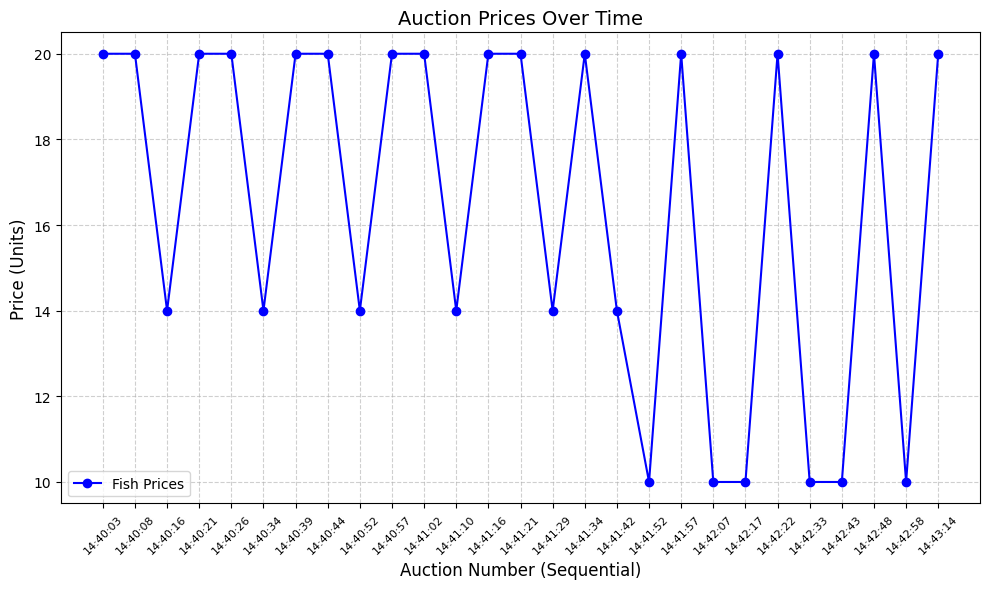

In [23]:
import matplotlib.pyplot as plt

# Data processing from the log
sale_times = ["14:40:03", "14:40:08", "14:40:16", "14:40:21", "14:40:26", "14:40:34", "14:40:39", "14:40:44",
              "14:40:52", "14:40:57", "14:41:02", "14:41:10", "14:41:16", "14:41:21", "14:41:29", "14:41:34",
              "14:41:42", "14:41:52", "14:41:57", "14:42:07", "14:42:17", "14:42:22", "14:42:33", "14:42:43",
              "14:42:48", "14:42:58", "14:43:14"]
prices = [20, 20, 14, 20, 20, 14, 20, 20, 14, 20, 20, 14, 20, 20, 14, 20, 14, 10, 20, 10, 10, 20, 10, 10, 20, 10, 20]

# Convert times into indices for plotting
x = list(range(len(sale_times)))


# Plotting
def plot_fish_sales():
    plt.figure(figsize=(10, 6))
    plt.plot(x, prices, marker='o', linestyle='-', color='blue', label='Fish Prices')

    # Labels and title
    plt.xlabel('Auction Number (Sequential)', fontsize=12)
    plt.ylabel('Price (Units)', fontsize=12)
    plt.title('Auction Prices Over Time', fontsize=14)

    # x-axis with formatted times
    plt.xticks(ticks=x, labels=sale_times, rotation=45, fontsize=8)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()

    # Save and show
    plt.savefig('fish_sales_graph.png')
    plt.show()


plot_fish_sales()


Ahora Analizamos cómo los diferentes tipos de comerciantes (agentes) interactúan con el sistema de subasta y entre ellos, evidenciado por el cambio en sus presupuestos tras las rondas de subasta. Los resultados son explicados a continuacion y pueden verse en el grafico

Interacción Entre Agentes
Estrategias de Compra Basadas en Tipos de Agentes:

RichMerchant_1: Representa a los comerciantes ricos, con un presupuesto elevado (500). Su interacción es más conservadora, enfocándose en pescados preferidos o de alta calidad. Esto le permite mantenerse activo en la subasta durante más tiempo, realizando compras menos frecuentes pero estratégicas.
BasicMerchants (1, 2, 3): Los comerciantes básicos tienen presupuestos más limitados (100) y realizan compras más frecuentes, lo que refleja una estrategia activa pero menos enfocada. Esto se traduce en caídas regulares en sus líneas, indicando que compiten más por productos generales.
PoorMerchants (1, 2): Los comerciantes pobres, con presupuestos muy limitados (50), tienen un patrón de interacción más oportunista. Sus líneas muestran caídas ocasionales, lo que refleja compras en rondas donde los precios bajan significativamente.
Competencia y Participación:

Los comerciantes básicos y pobres compiten más agresivamente por pescados baratos, reflejando interacciones donde los comerciantes con menos presupuesto se ven forzados a actuar rápido antes de agotar sus recursos.
Los comerciantes ricos, con su capacidad financiera, tienden a dominar en rondas donde el precio inicial es más alto, evitando la competencia directa con agentes de menor presupuesto.
Impacto del Operador:

El operador regula la interacción al ajustar los precios en cada ronda, creando oportunidades para diferentes tipos de agentes. Los pescados que alcanzan precios bajos atraen más a los comerciantes pobres, mientras que los básicos y ricos tienen más opciones de competir en múltiples rondas.
Diferencias en los Tipos de Agentes
Agentes Ricos: Participan estratégicamente y conservan su presupuesto para pescados preferidos o valiosos, reduciendo la presión en las rondas iniciales.
Agentes Básicos: Se involucran activamente en muchas rondas, compitiendo tanto con comerciantes ricos como pobres.
Agentes Pobres: Interactúan selectivamente, esperando rondas donde los precios bajan lo suficiente, lo que demuestra una dependencia fuerte de las decisiones del operador.


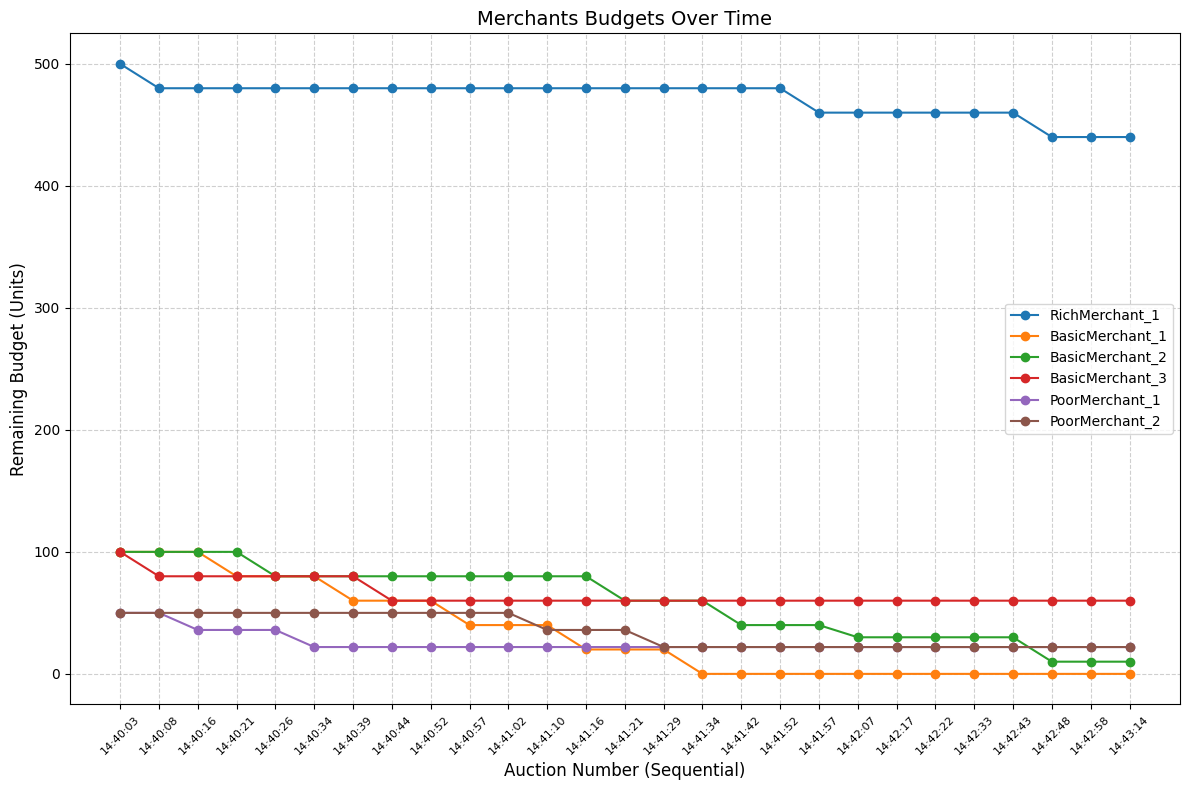

In [ ]:
import matplotlib.pyplot as plt

# Data processing from the log
sale_times = ["14:40:03", "14:40:08", "14:40:16", "14:40:21", "14:40:26", "14:40:34", "14:40:39", "14:40:44",
              "14:40:52", "14:40:57", "14:41:02", "14:41:10", "14:41:16", "14:41:21", "14:41:29", "14:41:34",
              "14:41:42", "14:41:52", "14:41:57", "14:42:07", "14:42:17", "14:42:22", "14:42:33", "14:42:43",
              "14:42:48", "14:42:58", "14:43:14"]
prices = [20, 20, 14, 20, 20, 14, 20, 20, 14, 20, 20, 14, 20, 20, 14, 20, 14, 10, 20, 10, 10, 20, 10, 10, 20, 10, 20]

# Merchants' budgets over time
merchant_budgets = {
    "RichMerchant_1": [500, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 460,
                       460, 460, 460, 460, 460, 440, 440, 440],
    "BasicMerchant_1": [100, 100, 100, 80, 80, 80, 60, 60, 60, 40, 40, 40, 20, 20, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                        0],
    "BasicMerchant_2": [100, 100, 100, 100, 80, 80, 80, 80, 80, 80, 80, 80, 80, 60, 60, 60, 40, 40, 40, 30, 30, 30, 30,
                        30, 10, 10, 10],
    "BasicMerchant_3": [100, 80, 80, 80, 80, 80, 80, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60,
                        60, 60, 60],
    "PoorMerchant_1": [50, 50, 36, 36, 36, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
                       22, 22, 22],
    "PoorMerchant_2": [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 36, 36, 36, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
                       22, 22, 22]
}

# Convert times into indices for plotting
x = list(range(len(sale_times)))


# Plotting
def plot_merchant_budgets():
    plt.figure(figsize=(12, 8))
    for merchant, budgets in merchant_budgets.items():
        plt.plot(x, budgets, marker='o', linestyle='-', label=merchant)

    # Labels and title
    plt.xlabel('Auction Number (Sequential)', fontsize=12)
    plt.ylabel('Remaining Budget (Units)', fontsize=12)
    plt.title('Merchants Budgets Over Time', fontsize=14)

    # x-axis with formatted times
    plt.xticks(ticks=x, labels=sale_times, rotation=45, fontsize=8)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()

    # Save and show
    plt.savefig('merchant_budgets_graph.png')
    plt.show()


plot_merchant_budgets()

### **Caso II: Subasta con Restricción (Cantidad de Peces Limitada)**

Este análisis se basa en dos gráficos: **1. presupuestos de los comerciantes a lo largo del tiempo** y **2. precios de los pescados en cada ronda de subasta.** En este escenario, el operador tiene una cantidad limitada de pescado, lo que aumenta la presión competitiva entre los comerciantes y altera sus estrategias.

---

### **Gráfico 1: Presupuestos de los Comerciantes**

1. **Propósito:**  
   - Visualizar cómo los comerciantes ajustan sus presupuestos bajo la restricción de inventario.

2. **Impacto de la Oferta Limitada:**
   - Los comerciantes con presupuestos más altos, como **RichMerchant_1**, compran estratégicamente en rondas iniciales para asegurar sus pescados preferidos, lo que se refleja en caídas ocasionales en su presupuesto.
   - Los comerciantes básicos y pobres enfrentan mayor presión, compitiendo activamente en rondas con precios bajos para maximizar su inversión.
   - El presupuesto de los comerciantes pobres disminuye más rápido, destacando su lucha por participar en un mercado restringido.

3. **Cambio de Estrategia:**
   - Los comerciantes deben actuar más rápido para asegurar pescados, ya que la oferta limitada reduce las oportunidades en rondas posteriores.
   - Los básicos y pobres evitan esperar a que los precios bajen demasiado, lo que genera competencia incluso en rondas con precios iniciales altos.

---

### **Gráfico 2: Precios de los Pescados**

1. **Propósito:**  
   - Mostrar cómo las restricciones de oferta afectan la evolución de los precios en la subasta.

2. **Evolución de los Precios:**
   - Los precios iniciales se mantienen altos en más rondas, indicando que los comerciantes están dispuestos a pagar más temprano debido a la oferta limitada.
   - Las caídas abruptas en los precios son menos frecuentes, ya que la competencia fuerza a los comerciantes a comprar antes de que los precios bajen significativamente.

3. **Interacción Competitiva:**
   - Los comerciantes ricos dominan las rondas iniciales, mientras que los básicos y pobres deben ser más agresivos para asegurar algún pescado, aumentando la presión competitiva.
   - La oferta limitada fomenta decisiones menos oportunistas y más orientadas a asegurar productos rápidamente.

---

### **Cambios en la Estrategia de los Agentes Comparado con el Escenario I**

| **Aspecto**               | **Escenario I (Oferta Infinita)**         | **Escenario II (Oferta Limitada)**       |
|----------------------------|-------------------------------------------|-------------------------------------------|
| **Competencia**            | Baja: los agentes esperan precios bajos. | Alta: la oferta limitada intensifica la competencia. |
| **Estrategia de Compra**   | Oportunista: esperar precios mínimos.     | Proactiva: comprar antes para asegurar pescado. |
| **Presión en Presupuestos**| Menor, favoreciendo compras escalonadas. | Mayor, agotando rápidamente recursos limitados. |
| **Precios**                | Más caídas a valores bajos.              | Precios más altos en rondas iniciales.     |

---

### **Conclusión**
En este escenario, la restricción de inventario cambia significativamente las dinámicas entre agentes. Los comerciantes, especialmente los pobres y básicos, deben adaptarse a la presión de la oferta limitada, adoptando estrategias más agresivas para competir por los pescados disponibles. Esto lleva a transacciones más rápidas y precios más altos en comparación con el escenario de oferta infinita.


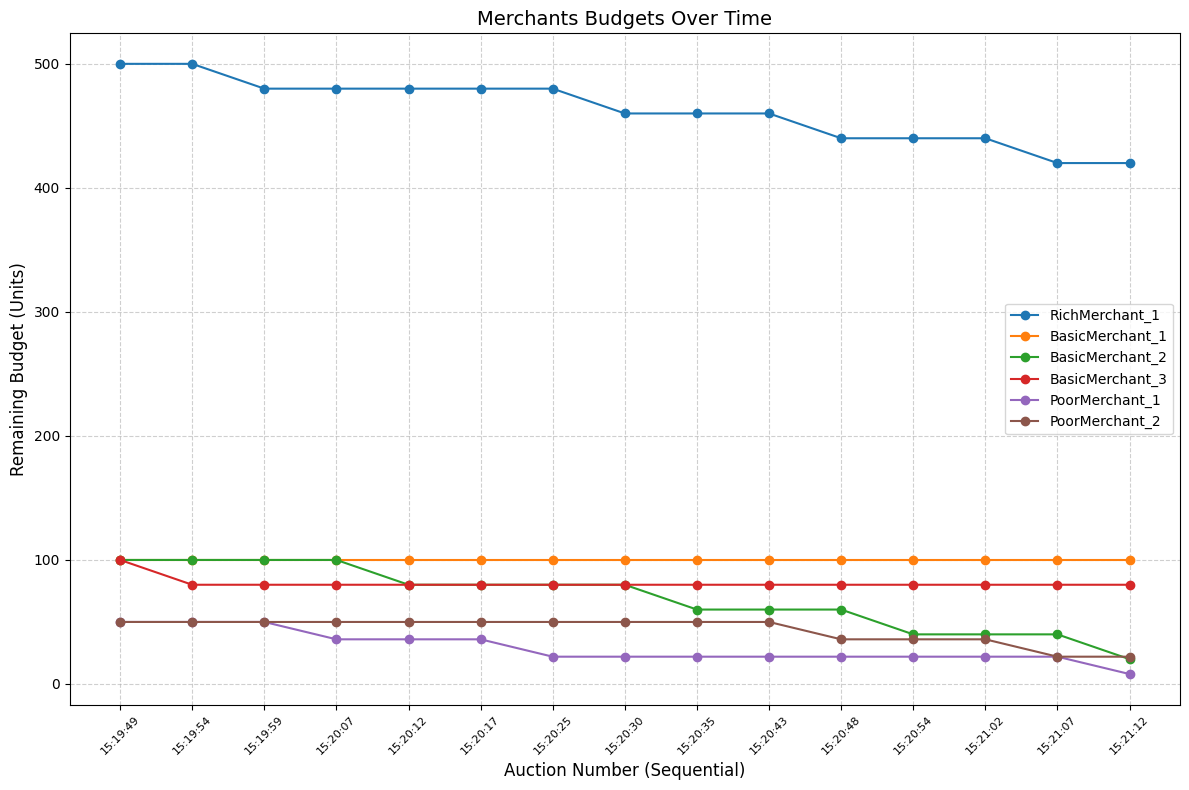

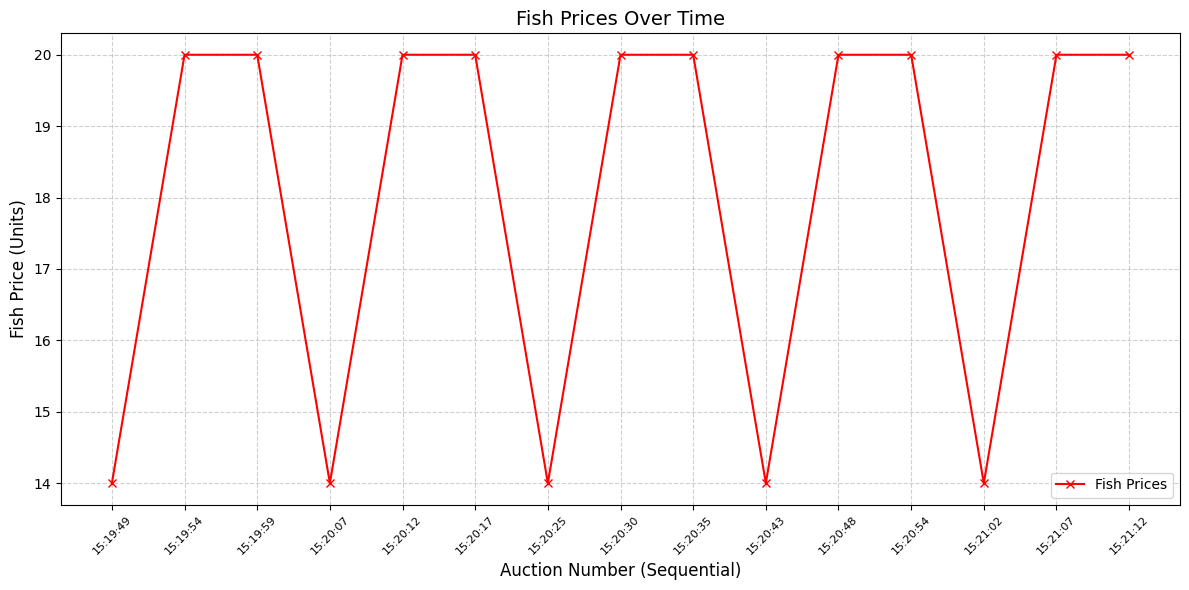

In [20]:
import matplotlib.pyplot as plt

# Data processing from the log
sale_times = ["15:19:49", "15:19:54", "15:19:59", "15:20:07", "15:20:12", "15:20:17", "15:20:25", "15:20:30",
              "15:20:35", "15:20:43", "15:20:48", "15:20:54", "15:21:02", "15:21:07", "15:21:12"]
prices = [14, 20, 20, 14, 20, 20, 14, 20, 20, 14, 20, 20, 14, 20, 20]

# Merchants' budgets over time
merchant_budgets = {
    "RichMerchant_1": [500, 500, 480, 480, 480, 480, 480, 460, 460, 460, 440, 440, 440, 420, 420],
    "BasicMerchant_1": [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100],
    "BasicMerchant_2": [100, 100, 100, 100, 80, 80, 80, 80, 60, 60, 60, 40, 40, 40, 20],
    "BasicMerchant_3": [100, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80],
    "PoorMerchant_1": [50, 50, 50, 36, 36, 36, 22, 22, 22, 22, 22, 22, 22, 22, 8],
    "PoorMerchant_2": [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 36, 36, 36, 22, 22]
}

# Convert times into indices for plotting
x = list(range(len(sale_times)))


# Plotting
def plot_merchant_budgets():
    plt.figure(figsize=(12, 8))
    for merchant, budgets in merchant_budgets.items():
        plt.plot(x, budgets, marker='o', linestyle='-', label=merchant)

    # Labels and title
    plt.xlabel('Auction Number (Sequential)', fontsize=12)
    plt.ylabel('Remaining Budget (Units)', fontsize=12)
    plt.title('Merchants Budgets Over Time', fontsize=14)

    # x-axis with formatted times
    plt.xticks(ticks=x, labels=sale_times, rotation=45, fontsize=8)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()

    # Save and show
    plt.savefig('merchant_budgets_graph.png')
    plt.show()


def plot_prices_over_time():
    plt.figure(figsize=(12, 6))
    plt.plot(x, prices, marker='x', linestyle='-', color='red', label='Fish Prices')

    # Labels and title
    plt.xlabel('Auction Number (Sequential)', fontsize=12)
    plt.ylabel('Fish Price (Units)', fontsize=12)
    plt.title('Fish Prices Over Time', fontsize=14)

    # x-axis with formatted times
    plt.xticks(ticks=x, labels=sale_times, rotation=45, fontsize=8)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()

    # Save and show
    plt.savefig('fish_prices_graph.png')
    plt.show()


plot_merchant_budgets()
plot_prices_over_time()


### **Análisis de los Escenarios III y IV: Introducción de la Variable Calidad**

Con la introducción de la **calidad del pescado** (buena, normal, mala), las decisiones de compra de los comerciantes ahora consideran este nuevo factor junto al precio y las preferencias personales. Esto altera significativamente la dinámica de la subasta y las estrategias de los agentes.

---

### **Escenario III: Oferta Infinita con Decisiones Basadas en Calidad**

1. **Descripción:**
   - El operador tiene un suministro ilimitado de pescado.
   - Los comerciantes ajustan sus decisiones de compra según **precio**, **preferencias** y **calidad del pescado**.

2. **Impacto de la Calidad en las Decisiones de los Comerciantes:**
   - **Ricos:** Evitan completamente pescados de mala calidad, incluso si son de su preferencia. Si un pescado es de buena calidad y de su preferencia, lo compran automáticamente, sin participar en la subasta.
   - **Básicos:** Consideran pescados de baja calidad si son de su preferencia (50% de probabilidad), pero evitan pescados no preferidos de mala calidad.
   - **Pobres:** Mantienen su lógica original, comprando únicamente pescados baratos, independientemente de la calidad.

3. **Efectos en la Interacción Entre Agentes:**
   - Los comerciantes ricos adquieren pescados de alta calidad rápidamente, limitando las opciones disponibles para comerciantes básicos y pobres.
   - Los comerciantes básicos enfrentan más presión competitiva en rondas con pescados de calidad normal o buena.
   - Los comerciantes pobres, sin priorizar la calidad, aprovechan pescados baratos que no interesan a otros comerciantes.

4. **Resultados Esperados:**
   - **Precios:** Más estables debido a la oferta ilimitada, pero picos en rondas con pescados de alta calidad que son adquiridos directamente por los ricos.
   - **Presupuestos:** Los ricos muestran caídas rápidas en rondas clave (compra directa). Los básicos y pobres agotan sus recursos en rondas posteriores con pescados accesibles.

---

### **Escenario IV: Oferta Limitada con Decisiones Basadas en Calidad**

1. **Descripción:**
   - El operador tiene un inventario limitado de pescado.
   - La calidad influye significativamente en las decisiones de compra, generando una mayor presión competitiva.

2. **Impacto de la Calidad en las Decisiones de los Comerciantes:**
   - **Ricos:** Compiten agresivamente por pescados de buena calidad y de su preferencia. Evitan pescados de mala calidad, aumentando su selectividad.
   - **Básicos:** Incrementan la probabilidad de comprar pescados de baja calidad si son de su preferencia (50%), pero enfrentan mayor presión para adquirir pescados de calidad normal o buena.
   - **Pobres:** Continúan priorizando pescados baratos, sin considerar calidad, pero se ven excluidos de rondas con alta presión por pescados de calidad.

3. **Efectos en la Interacción Entre Agentes:**
   - La calidad introduce un nivel adicional de competencia, especialmente por pescados buenos, donde ricos y básicos compiten activamente.
   - Los comerciantes pobres enfrentan aún más restricciones, limitándose a rondas con pescados de baja calidad o precios mínimos.

4. **Resultados Esperados:**
   - **Precios:** Más altos en general debido a la oferta limitada y la mayor demanda por pescados de buena calidad.
   - **Presupuestos:** Los ricos gastan agresivamente en rondas con pescados de alta calidad. Los básicos agotan más rápido sus recursos al intentar competir con ricos. Los pobres tienen menor participación efectiva.

---

### **Comparación Entre Escenarios III y IV**

| **Aspecto**               | **Escenario III (Oferta Infinita)**                          | **Escenario IV (Oferta Limitada)**                          |
|----------------------------|-------------------------------------------------------------|-------------------------------------------------------------|
| **Impacto de la Calidad**  | Calidad introduce una competencia moderada.                 | Calidad intensifica la presión competitiva.                 |
| **Decisiones Estratégicas**| Ricos dominan pescados de alta calidad.                     | Ricos y básicos compiten agresivamente por calidad.         |
| **Participación de Pobres**| Pobres aprovechan pescados no deseados por calidad.          | Pobres quedan relegados en rondas de alta presión.          |
| **Precios**                | Más estables debido a la oferta ilimitada.                  | Más altos debido a la escasez y competencia por calidad.    |

---

### **Conclusión**
La introducción de la calidad del pescado como variable clave modifica profundamente las decisiones de los comerciantes. En ambos escenarios, los ricos priorizan pescados de alta calidad, dominando rondas clave. En el caso de oferta limitada (Escenario IV), la presión competitiva se amplifica significativamente, afectando a los comerciantes básicos y prácticamente excluyendo a los pobres en rondas con alta demanda. Este análisis resalta cómo la calidad puede reconfigurar la dinámica de una subasta holandesa.

### **Análisis del Escenario III: Oferta Infinita con Decisiones Basadas en Calidad**

Este código presenta el comportamiento de los agentes en el **Escenario III**, donde la introducción de la **calidad del pescado** (buena, normal, mala) y las nuevas reglas de compra afectan significativamente los precios y las estrategias de los comerciantes. A continuación, se compara este escenario con el **Escenario I**, donde no existía la variable calidad y las decisiones estaban basadas únicamente en precio y preferencias personales.

---

### **Impacto de la Introducción de la Calidad**

1. **Cambios en los Precios:**
   - En el Escenario III, los precios iniciales son más altos (30 unidades) y se mantienen elevados en varias rondas debido a que los comerciantes ricos adquieren pescados de buena calidad y de su preferencia automáticamente.
   - Las caídas de precios son menos frecuentes y más escalonadas en comparación con el Escenario I, ya que los pescados de menor calidad tienen menor demanda por parte de los comerciantes básicos y ricos.
   - Los pescados de baja calidad, sin demanda, terminan alcanzando precios mínimos (10-14 unidades), lo que refleja que solo los comerciantes pobres los adquieren.

2. **Estrategias de Compra:**
   - **Comerciantes Ricos:** En este escenario, evitan pescados de mala calidad y priorizan los de buena calidad, comprándolos inmediatamente si son de su preferencia. Esto reduce la cantidad de rondas donde los básicos y pobres pueden competir.
   - **Comerciantes Básicos:** Realizan compras balanceadas. Compran pescados de baja calidad de su preferencia con una probabilidad del 50%, pero compiten más activamente por pescados de calidad normal o buena.
   - **Comerciantes Pobres:** Mantienen su lógica basada en precios bajos, adquiriendo pescados de baja calidad que no interesan a otros comerciantes.

---

### **Comparación con el Escenario I**

| **Aspecto**               | **Escenario I (Sin Calidad)**                        | **Escenario III (Con Calidad)**                           |
|----------------------------|-----------------------------------------------------|-----------------------------------------------------------|
| **Estrategias de Compra**  | Basadas únicamente en precio y preferencias.         | Incorporan calidad como criterio clave.                   |
| **Precios**                | Más fluctuaciones y frecuentes caídas a precios mínimos. | Menos fluctuaciones, precios iniciales más altos.          |
| **Dominio de Ricos**       | Participación estratégica y moderada.               | Dominan las rondas con pescados de buena calidad.          |
| **Participación de Pobres**| Alta, al aprovechar precios bajos en muchas rondas. | Reducida, limitada a pescados de baja calidad.            |

---

### **Análisis de los Gráficos**

#### **Gráfico de Presupuestos de los Comerciantes**
- **RichMerchant_1:** Mantiene un presupuesto alto en la mayoría de las rondas, excepto cuando adquiere pescados de buena calidad de forma directa. Esto refleja su comportamiento estratégico.
- **BasicMerchants:** Muestran caídas más consistentes en sus presupuestos, indicando una mayor participación en las rondas con pescados accesibles de calidad normal o buena.
- **PoorMerchants:** Sus presupuestos caen abruptamente en rondas con pescados de baja calidad, donde enfrentan menos competencia.

#### **Gráfico de Precios del Pescado**
- Los precios se mantienen altos al inicio y caen gradualmente, pero con menos frecuencia que en el Escenario I.
- Los picos en 30 unidades corresponden a pescados de buena calidad comprados inmediatamente por comerciantes ricos, eliminando la competencia.

---

### **Conclusión**
La introducción de la variable **calidad del pescado** altera significativamente las dinámicas del mercado:
1. **Precios:** Más altos en promedio debido a la priorización de pescados de buena calidad por los comerciantes ricos y básicos.
2. **Estrategias:** Los agentes ajustan sus decisiones, aumentando la presión en rondas con pescados de calidad superior y reduciendo la competencia por pescados de baja calidad.
3. **Participación:** Los comerciantes ricos dominan las rondas clave, mientras que los pobres quedan relegados a productos de menor calidad.

Este cambio muestra cómo la calidad agrega una dimensión adicional de competencia y exclusividad en el mercado de oferta infinita.

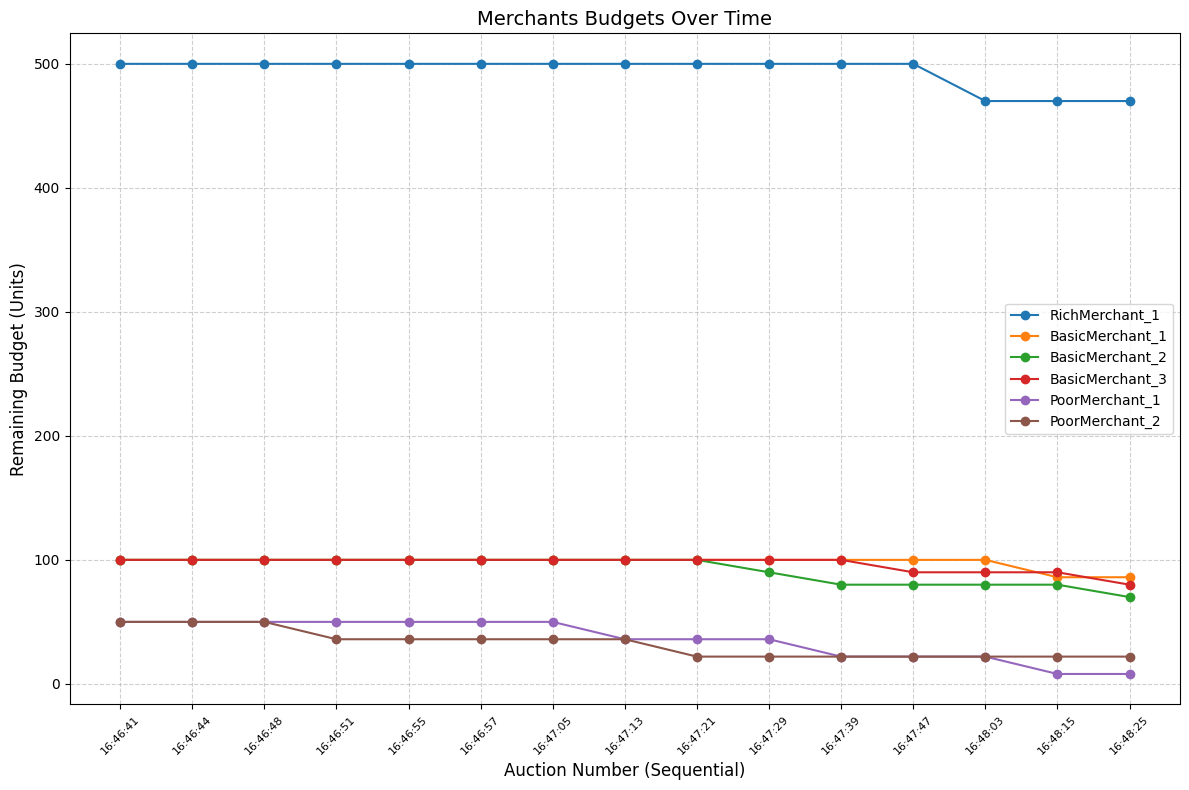

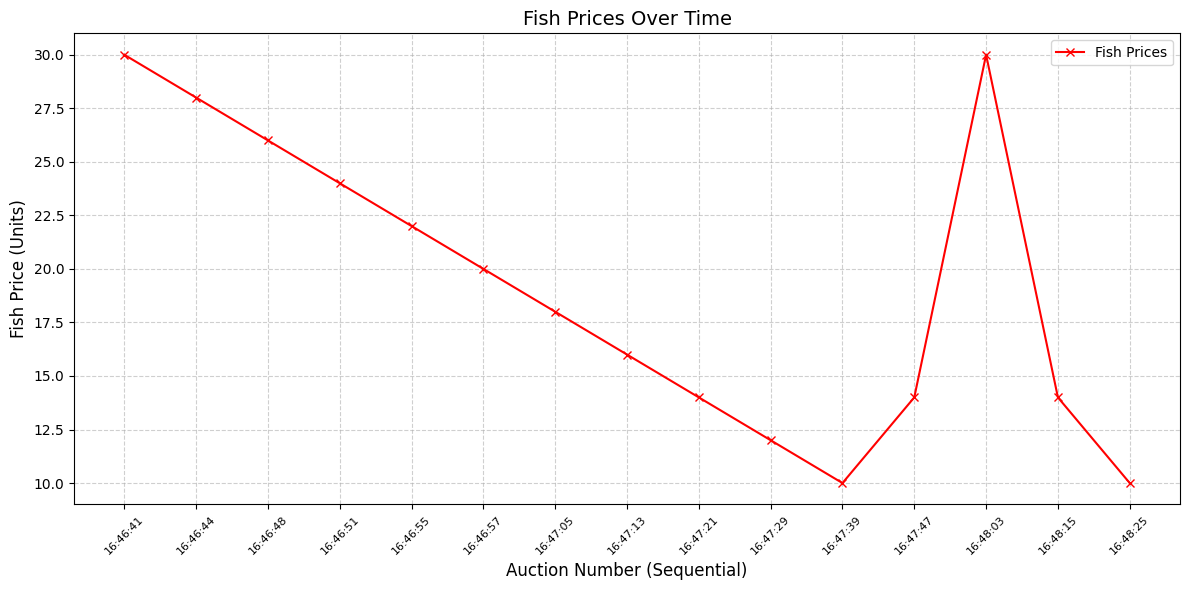

In [30]:
import matplotlib.pyplot as plt

# Data processing from the log
sale_times = [
    "16:46:41", "16:46:44", "16:46:48", "16:46:51", "16:46:55", "16:46:57", "16:47:05", "16:47:13",
    "16:47:21", "16:47:29", "16:47:39", "16:47:47", "16:48:03", "16:48:15", "16:48:25"
]
prices = [30, 28, 26, 24, 22, 20, 18, 16, 14, 12, 10, 14, 30, 14, 10]

# Merchants' budgets over time
merchant_budgets = {
    "RichMerchant_1": [500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 470, 470, 470],
    "BasicMerchant_1": [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 86, 86],
    "BasicMerchant_2": [100, 100, 100, 100, 100, 100, 100, 100, 100, 90, 80, 80, 80, 80, 70],
    "BasicMerchant_3": [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 90, 90, 90, 80],
    "PoorMerchant_1": [50, 50, 50, 50, 50, 50, 50, 36, 36, 36, 22, 22, 22, 8, 8],
    "PoorMerchant_2": [50, 50, 50, 36, 36, 36, 36, 36, 22, 22, 22, 22, 22, 22, 22]
}

# Convert times into indices for plotting
x = list(range(len(sale_times)))


# Plotting
def plot_merchant_budgets():
    plt.figure(figsize=(12, 8))
    for merchant, budgets in merchant_budgets.items():
        plt.plot(x, budgets, marker='o', linestyle='-', label=merchant)

    # Labels and title
    plt.xlabel('Auction Number (Sequential)', fontsize=12)
    plt.ylabel('Remaining Budget (Units)', fontsize=12)
    plt.title('Merchants Budgets Over Time', fontsize=14)

    # x-axis with formatted times
    plt.xticks(ticks=x, labels=sale_times, rotation=45, fontsize=8)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()

    # Save and show
    plt.savefig('merchant_budgets_graph.png')
    plt.show()


def plot_prices_over_time():
    plt.figure(figsize=(12, 6))
    plt.plot(x, prices, marker='x', linestyle='-', color='red', label='Fish Prices')

    # Labels and title
    plt.xlabel('Auction Number (Sequential)', fontsize=12)
    plt.ylabel('Fish Price (Units)', fontsize=12)
    plt.title('Fish Prices Over Time', fontsize=14)

    # x-axis with formatted times
    plt.xticks(ticks=x, labels=sale_times, rotation=45, fontsize=8)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()

    # Save and show
    plt.savefig('fish_prices_graph.png')
    plt.show()


plot_merchant_budgets()
plot_prices_over_time()


### **Análisis del Escenario IV: Oferta Limitada con Introducción de Calidad**

Este código corresponde al **Escenario IV**, donde el operador tiene una **oferta limitada** de pescado, y la calidad del pescado (buena, normal, mala) juega un papel crucial en las decisiones de compra de los comerciantes. A continuación, se analiza este escenario comparándolo con:

- **Escenario III:** Oferta ilimitada con calidad de pescado.
- **Escenario II:** Oferta limitada sin calidad de pescado.

---

### **Comparación con Escenarios Anteriores**

| **Aspecto**                | **Escenario II (Oferta Limitada, Sin Calidad)** | **Escenario III (Oferta Infinita, Con Calidad)** | **Escenario IV (Oferta Limitada, Con Calidad)** |
|-----------------------------|-----------------------------------------------|-------------------------------------------------|------------------------------------------------|
| **Disponibilidad**          | Oferta limitada de pescado.                  | Oferta ilimitada.                               | Oferta limitada de pescado.                   |
| **Estrategias de Compra**   | Basadas en precio y preferencias.            | Basadas en calidad, precio y preferencias.     | Basadas en calidad, precio y preferencias.    |
| **Precios**                 | Precios más altos debido a la competencia.   | Precios más estables, con picos por calidad.   | Precios fluctuantes, con picos por calidad.   |
| **Participación de Pobres** | Competencia restringida, pocas compras.      | Compran pescados de baja calidad y precios bajos. | Excluidos de rondas clave por alta presión.   |

---

### **Análisis del Gráfico**

#### **Gráfico de Presupuestos de los Comerciantes**
1. **RichMerchant_1:**  
   - Su presupuesto disminuye rápidamente en rondas con pescados de alta calidad y de su preferencia. Esto refleja un comportamiento agresivo debido a la competencia limitada y la alta demanda.
   - Asegura pescados clave en las primeras rondas, dejando menos opciones para los comerciantes básicos y pobres.

2. **BasicMerchants:**  
   - Los presupuestos muestran caídas más pronunciadas que en el Escenario III, lo que evidencia una competencia intensificada por pescados normales o buenos.
   - Los comerciantes básicos participan más activamente en rondas intermedias con pescados de calidad aceptable.

3. **PoorMerchants:**  
   - Sus presupuestos se agotan rápidamente en rondas donde los precios alcanzan valores bajos. La calidad no influye en sus decisiones, pero quedan prácticamente excluidos de las rondas con alta presión.

---

#### **Gráfico de Precios del Pescado**
1. **Precios Altos Iniciales:**
   - Los pescados de buena calidad tienen precios iniciales elevados (30 unidades), reflejando su alta demanda. Estos pescados son adquiridos rápidamente por comerciantes ricos sin permitir competencia.
   
2. **Fluctuaciones Intermedias:**
   - Los pescados de calidad normal o baja tienen precios más variables debido a la competencia de los básicos y pobres en rondas intermedias.

3. **Precios Bajos Finales:**
   - Algunos pescados de baja calidad alcanzan precios mínimos (14 unidades), siendo adquiridos principalmente por comerciantes pobres.

---

### **Impacto de la Introducción de Calidad en el Escenario IV**

1. **Estrategias Modificadas:**
   - La calidad intensifica la presión competitiva, especialmente por pescados buenos o normales, donde los ricos y básicos compiten activamente.
   - Los comerciantes pobres quedan más limitados en este escenario, comprando solo pescados que no interesan a los demás.

2. **Precios Más Altos en Promedio:**
   - En comparación con el Escenario II, la introducción de la calidad aumenta el precio promedio de los pescados debido a la alta demanda por productos de calidad superior.
   - Los precios son más variables que en el Escenario III, reflejando la combinación de calidad y oferta limitada.

---

### **Conclusión**

El **Escenario IV** combina la presión competitiva de la **oferta limitada** del Escenario II con la complejidad adicional de la **calidad del pescado** introducida en el Escenario III. Esto resulta en:
- **Precios:** Más altos y fluctuantes debido a la mayor demanda por pescados buenos y la competencia por productos limitados.
- **Estrategias:** Los comerciantes ricos dominan las rondas clave, mientras que los básicos compiten activamente en rondas intermedias. Los pobres quedan excluidos de muchas rondas por la presión competitiva.
- **Dinamismo:** Este escenario refleja el mercado más competitivo y complejo, donde la calidad se convierte en un factor decisivo para la mayoría de los agentes.

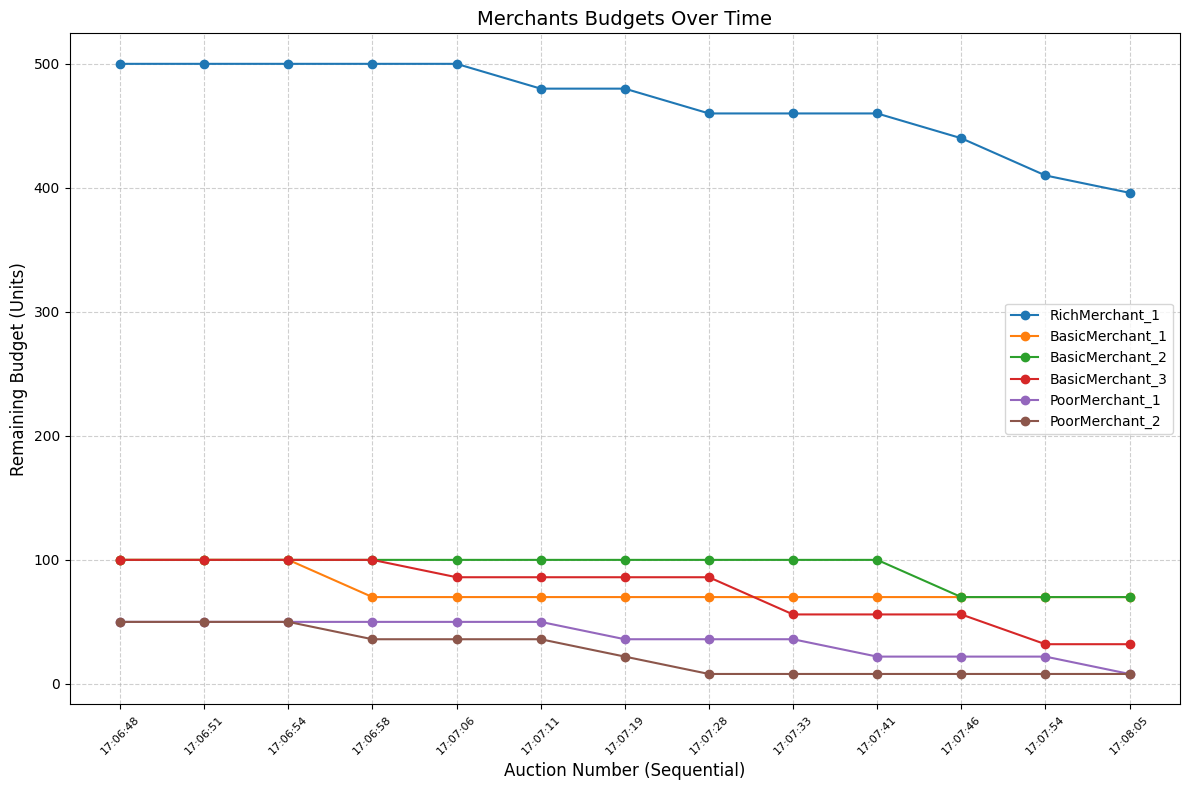

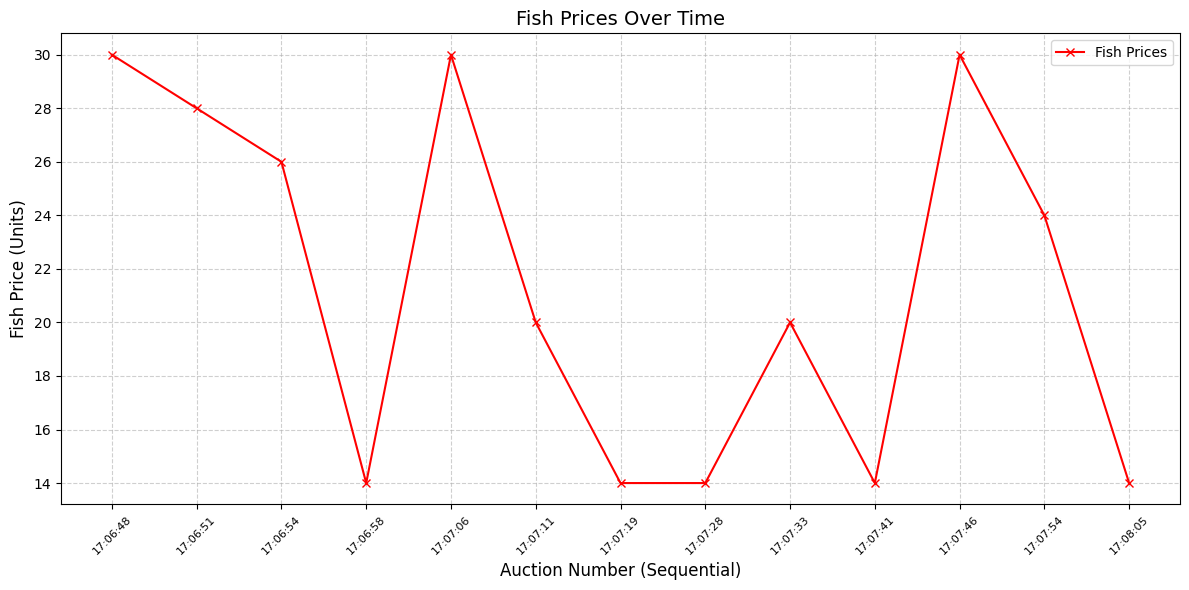

In [31]:
import matplotlib.pyplot as plt

# Data processing from the log
sale_times = [
    "17:06:48", "17:06:51", "17:06:54", "17:06:58", "17:07:06", "17:07:11", "17:07:19", "17:07:28",
    "17:07:33", "17:07:41", "17:07:46", "17:07:54", "17:08:05"
]
prices = [30, 28, 26, 14, 30, 20, 14, 14, 20, 14, 30, 24, 14]

# Merchants' budgets over time
merchant_budgets = {
    "RichMerchant_1": [500, 500, 500, 500, 500, 480, 480, 460, 460, 460, 440, 410, 396],
    "BasicMerchant_1": [100, 100, 100, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70],
    "BasicMerchant_2": [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 70, 70, 70],
    "BasicMerchant_3": [100, 100, 100, 100, 86, 86, 86, 86, 56, 56, 56, 32, 32],
    "PoorMerchant_1": [50, 50, 50, 50, 50, 50, 36, 36, 36, 22, 22, 22, 8],
    "PoorMerchant_2": [50, 50, 50, 36, 36, 36, 22, 8, 8, 8, 8, 8, 8]
}

# Convert times into indices for plotting
x = list(range(len(sale_times)))


# Plotting
def plot_merchant_budgets():
    plt.figure(figsize=(12, 8))
    for merchant, budgets in merchant_budgets.items():
        plt.plot(x, budgets, marker='o', linestyle='-', label=merchant)

    # Labels and title
    plt.xlabel('Auction Number (Sequential)', fontsize=12)
    plt.ylabel('Remaining Budget (Units)', fontsize=12)
    plt.title('Merchants Budgets Over Time', fontsize=14)

    # x-axis with formatted times
    plt.xticks(ticks=x, labels=sale_times, rotation=45, fontsize=8)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()

    # Save and show
    plt.savefig('merchant_budgets_graph.png')
    plt.show()


def plot_prices_over_time():
    plt.figure(figsize=(12, 6))
    plt.plot(x, prices, marker='x', linestyle='-', color='red', label='Fish Prices')

    # Labels and title
    plt.xlabel('Auction Number (Sequential)', fontsize=12)
    plt.ylabel('Fish Price (Units)', fontsize=12)
    plt.title('Fish Prices Over Time', fontsize=14)

    # x-axis with formatted times
    plt.xticks(ticks=x, labels=sale_times, rotation=45, fontsize=8)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()

    # Save and show
    plt.savefig('fish_prices_graph.png')
    plt.show()


plot_merchant_budgets()
plot_prices_over_time()


Hecho por: Vega, Segura